In [1]:
import ROOT
import numpy as np
from array import *
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import math
import pandas as pd
plt.rcParams['text.usetex'] = True

In [2]:
def resultsTOtxt(arr,  filename):
#arr is the concatenated and transposed array of all the arrays wished to be written
#arrDescription a string describing and is each collumn of the file
#writes out each array concatenated in arr as an collumn in the file
    file = open(filename, 'w')
    np.savetxt(filename, arr, delimiter=' ')
    file.close()
    
def GetNpArraysFromTrees(tree, branch_name):
    estimate = 3e6 #amount of numbers getting from branch
    tree.SetEstimate(int(estimate))
    result_hist = tree.Draw(branch_name, "", "goff")
    result = np.asarray(np.frombuffer(tree.GetV1(), dtype=np.float64, count=result_hist))
    result = result.copy()
    return result

def GetNpArraysFromTrees2(tree, branch_name):
    estimate = 3e8 #amount of numbers getting from branch
    tree.SetEstimate(int(estimate))
    result_hist = tree.Draw(branch_name, "", "goff")
    result = np.asarray(np.frombuffer(tree.GetV1(), count=result_hist))
    result = result.copy()
    return result


#LIST_NUCLEARMODELS = ['hA_BR','hA_LFG', 'hA_ESF', 'hN_BR', 'hN_LFG', 'hN_ESF']

In [3]:
def ReadNuclearModelSamples(IsBDM, massANDboost=None):
    #print(massANDboost)
    sampels=[]
    global LIST_NUCLEARMODELS
    if IsBDM:
        fBDM_00a = ROOT.TFile.Open("/home/leoperes/ntuples_grid_newVertex/00a_newVertex/bdm_"+massANDboost+"_00a.root")
        if massANDboost != 'm20_b10':
            fBDM_01a = ROOT.TFile.Open('/home/leoperes/ntuples_grid_newVertex/01a_newVertex/bdm_'+massANDboost+'_01a.root')
        fBDM_02a = ROOT.TFile.Open('/home/leoperes/ntuples_grid_newVertex/02a_newVertex/bdm_'+massANDboost+'_02a.root')
        fBDM_00b = ROOT.TFile.Open('/home/leoperes/ntuples_grid_newVertex/00b_newVertex/bdm_'+massANDboost+'_00b.root')
        fBDM_01b = ROOT.TFile.Open('/home/leoperes/ntuples_grid_newVertex/01b_newVertex/bdm_'+massANDboost+'_01b.root')
        fBDM_02b = ROOT.TFile.Open('/home/leoperes/ntuples_grid_newVertex/02b_newVertex/bdm_'+massANDboost+'_02b.root')
        if massANDboost != 'm20_b10':
            samples = [fBDM_00a, fBDM_01a, fBDM_02a, fBDM_00b, fBDM_01b, fBDM_02b]
            LIST_NUCLEARMODELS = ['hA_BR','hA_LFG', 'hA_ESF', 'hN_BR', 'hN_LFG', 'hN_ESF']
        else:
            samples = [fBDM_00a, fBDM_02a, fBDM_00b, fBDM_01b, fBDM_02b]
            LIST_NUCLEARMODELS = ['hA_BR', 'hA_ESF', 'hN_BR', 'hN_LFG', 'hN_ESF']
        return samples
    if not IsBDM:
        LIST_NUCLEARMODELS = ['hA_BR','hA_LFG', 'hA_ESF', 'hN_BR', 'hN_LFG', 'hN_ESF']
        fAtm_00a = ROOT.TFile.Open('/home/leoperes/ntuples_grid_newVertex/00a_newVertex/atm_hA_BR_4ana.root')
        fAtm_01a = ROOT.TFile.Open('/home/leoperes/ntuples_grid_newVertex/01a_newVertex/atm_hA_LFG.root')
        fAtm_02a = ROOT.TFile.Open('/home/leoperes/ntuples_grid_newVertex/02a_newVertex/atm_hA_ESF.root')
        fAtm_00b = ROOT.TFile.Open('/home/leoperes/ntuples_grid_newVertex/00b_newVertex/atm_hN_BR.root')
        fAtm_01b = ROOT.TFile.Open('/home/leoperes/ntuples_grid_newVertex/01b_newVertex/atm_hN_LFG.root')
        fAtm_02b = ROOT.TFile.Open('/home/leoperes/ntuples_grid_newVertex/02b_newVertex/atm_hN_ESF.root')
        samples = [fAtm_00a, fAtm_01a, fAtm_02a, fAtm_00b, fAtm_01b, fAtm_02b]
        return samples

In [4]:
list_samples = ['m05_b1p1', 'm05_b1p5', 'm05_b10', 'm10_b1p1', 'm10_b1p5', 'm10_b10', 'm20_b1p1', 'm20_b1p5', 'm20_b10', 'm40_b1p1', 'm40_b1p5', 'm40_b10']
list_samples_latex = [r'$m_\chi = 5 ~\textrm{ GeV}, \; \gamma=1.1$', r'$m_\chi = 5 ~\textrm{ GeV}, \; \gamma=1.5$', r'$m_\chi = 5 ~\textrm{ GeV}, \; \gamma=10$', r'$m_\chi = 10 ~\textrm{ GeV}, \; \gamma=1.1$', r'$m_\chi = 10 ~\textrm{ GeV}, \; \gamma=1.5$', r'$m_\chi = 10 ~\textrm{ GeV}, \; \gamma=10$', r'$m_\chi = 20 ~\textrm{ GeV}, \; \gamma=1.1$', r'$m_\chi = 20 ~\textrm{ GeV}, \; \gamma=1.5$', r'$m_\chi = 20 ~\textrm{ GeV}, \; \gamma=10$', r'$m_\chi = 40 ~\textrm{ GeV}, \; \gamma=1.1$', r'$m_\chi = 40 ~\textrm{ GeV}, \; \gamma=1.5$', r'$m_\chi = 40 ~\textrm{ GeV}, \; \gamma=10$' ]

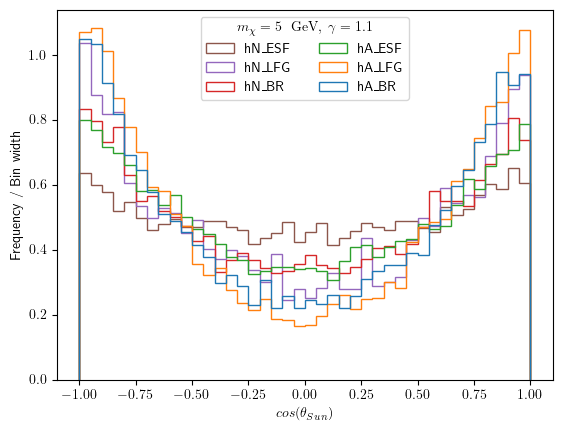

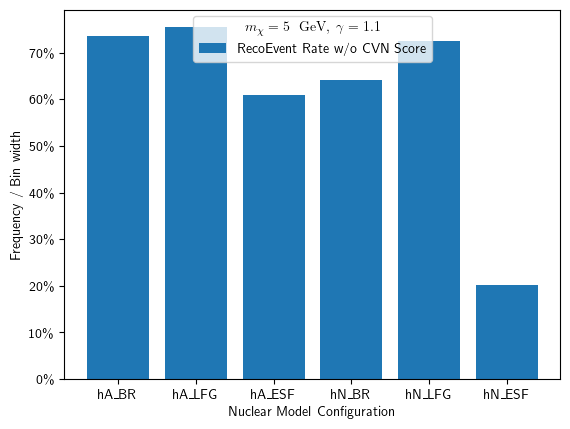

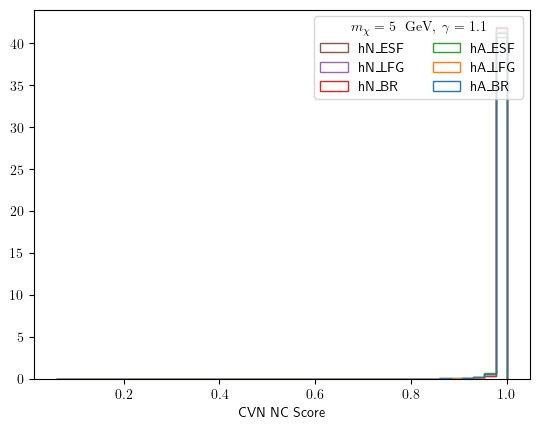

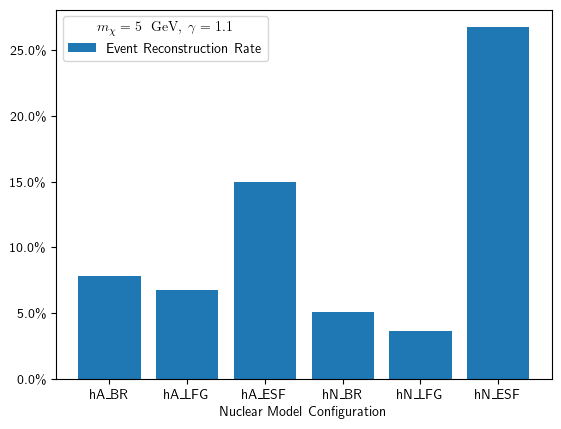

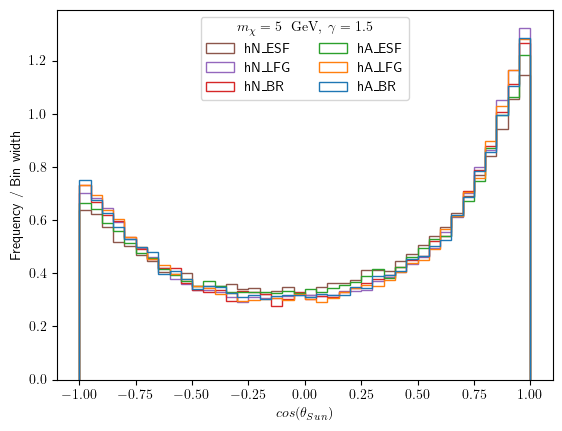

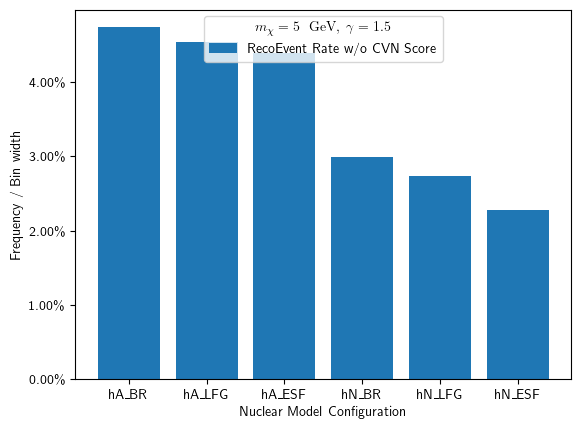

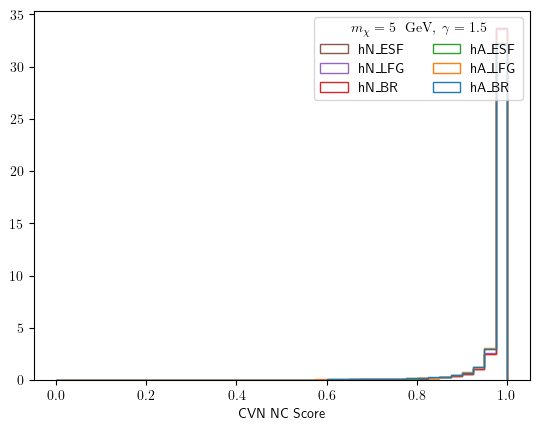

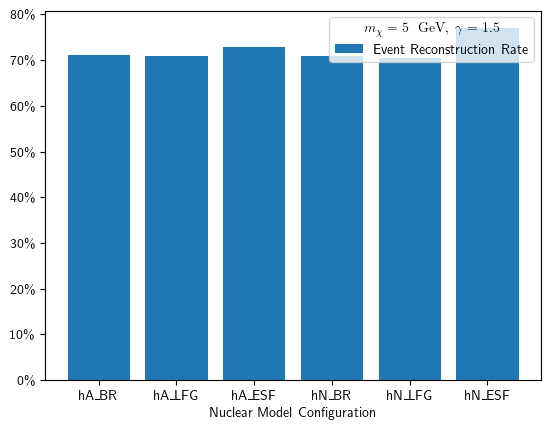

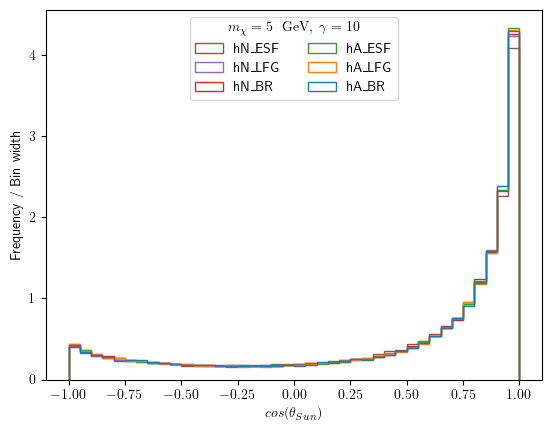

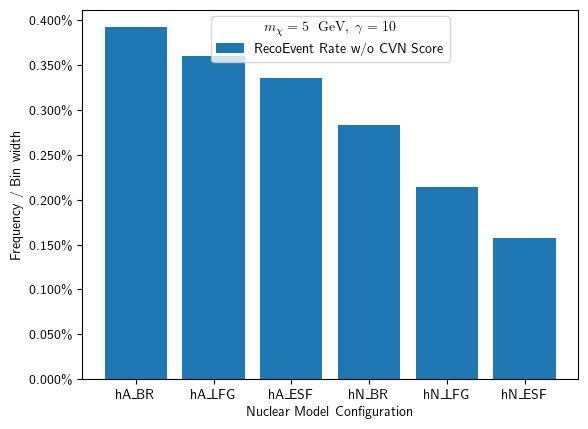

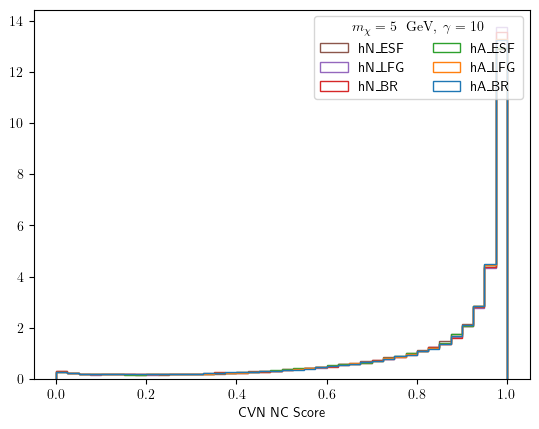

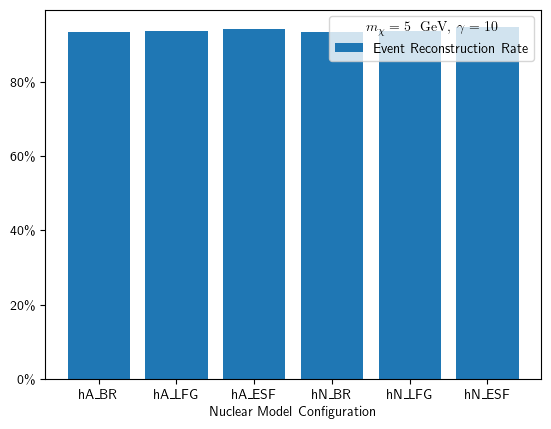

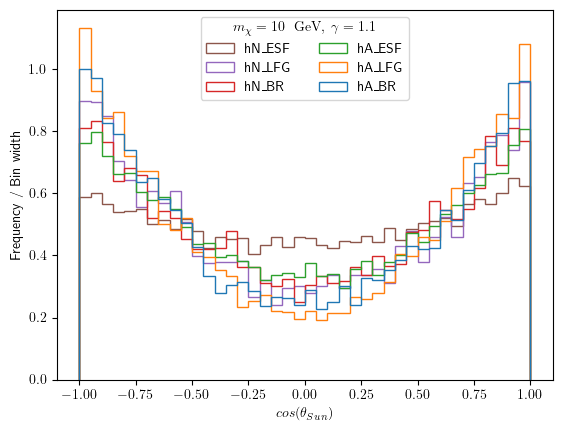

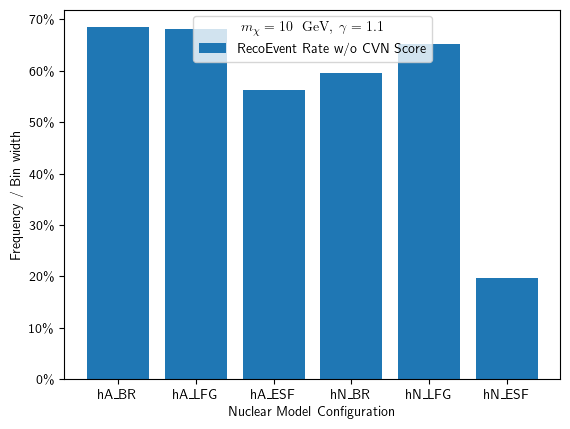

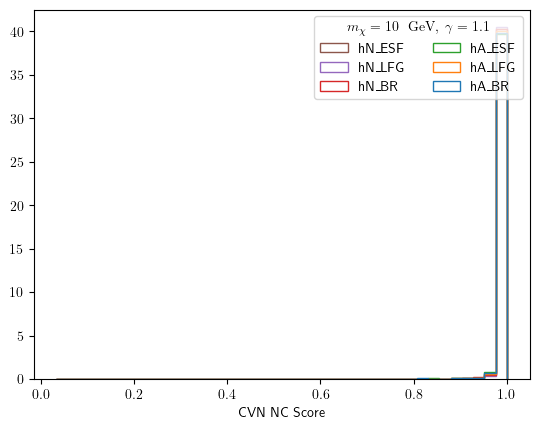

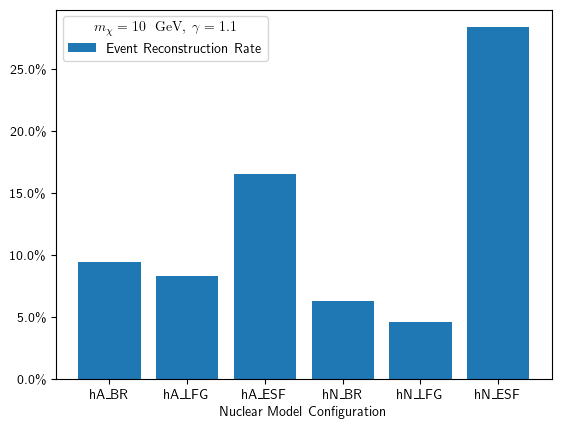

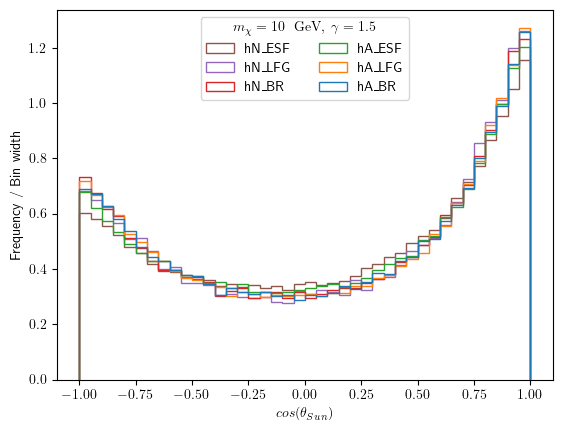

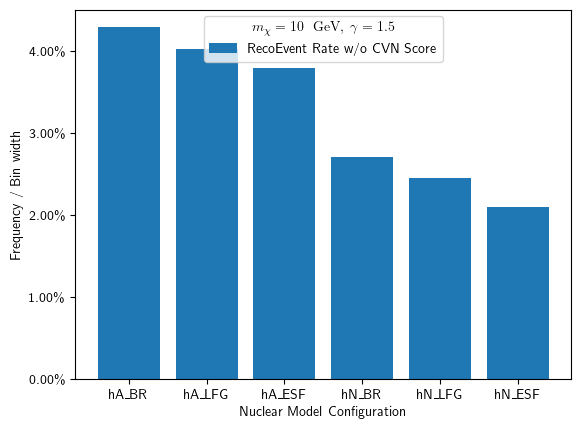

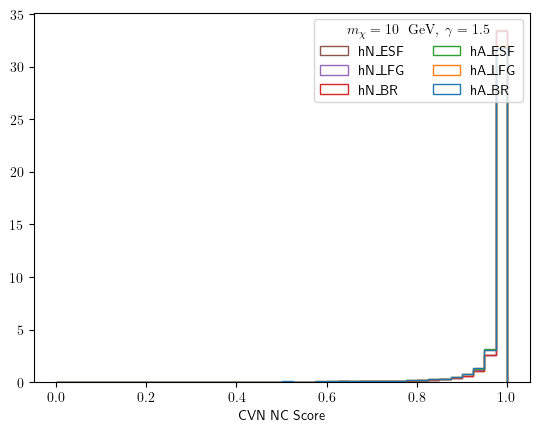

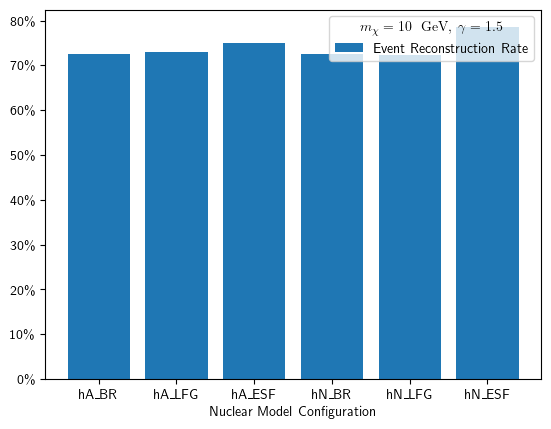

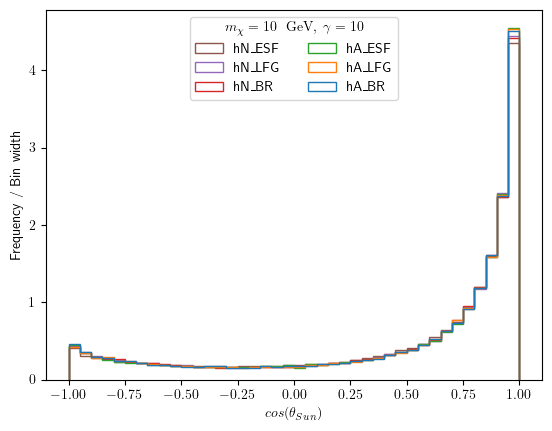

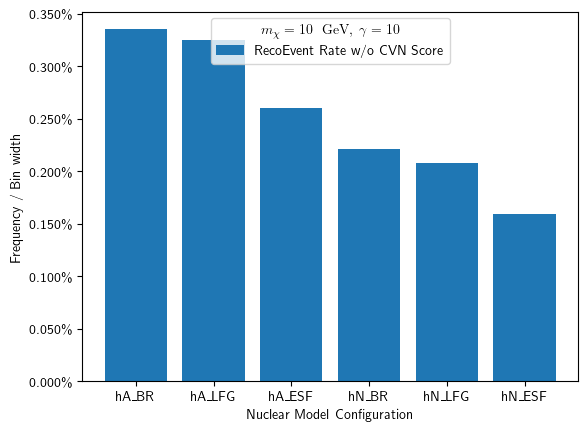

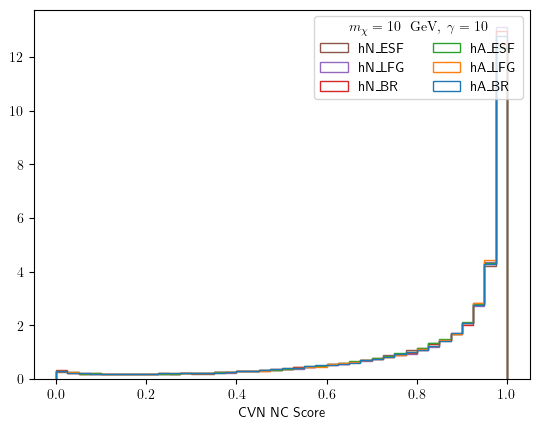

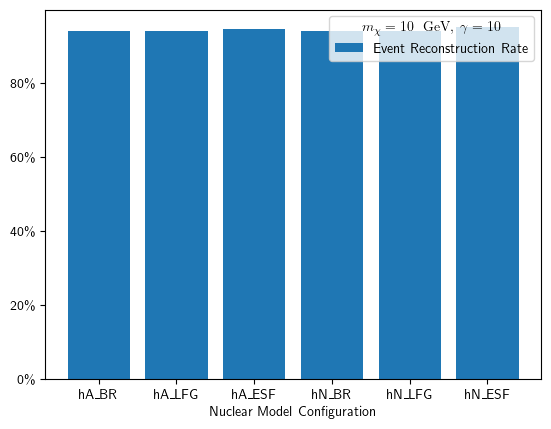

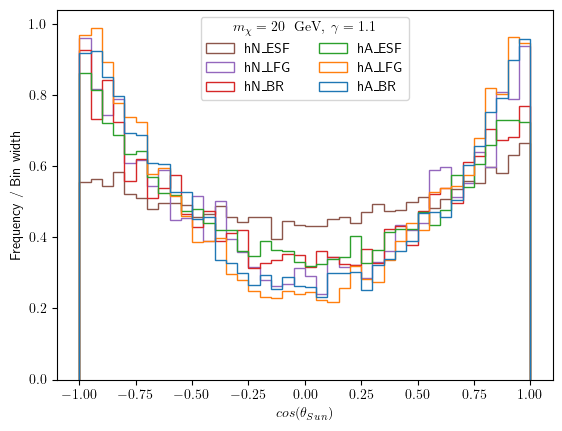

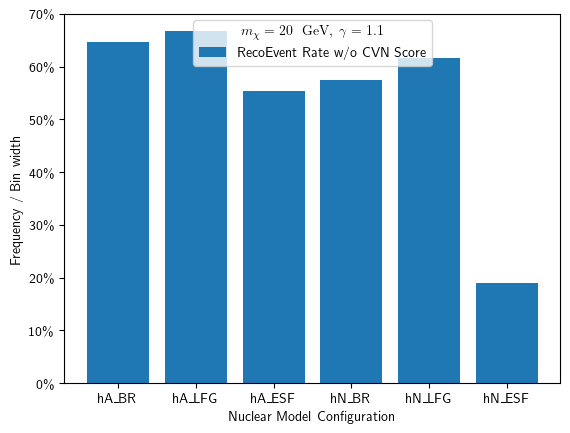

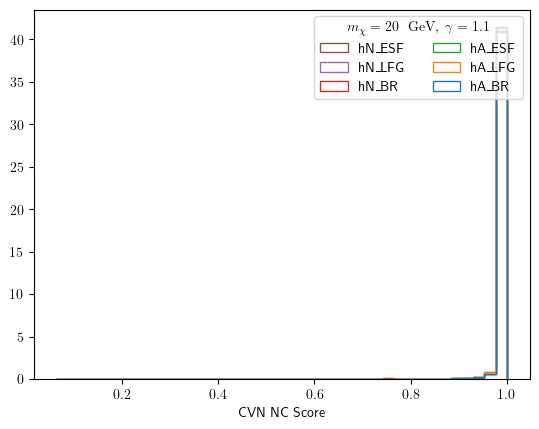

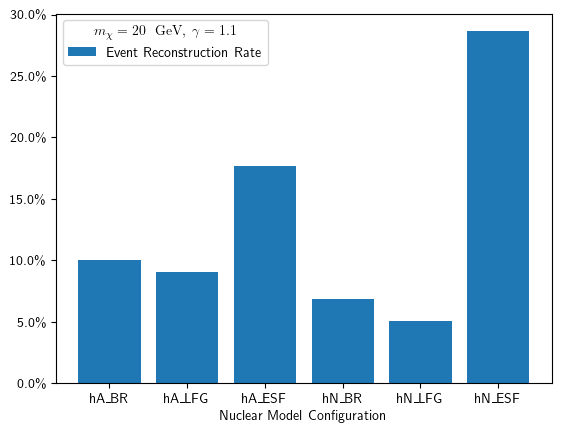

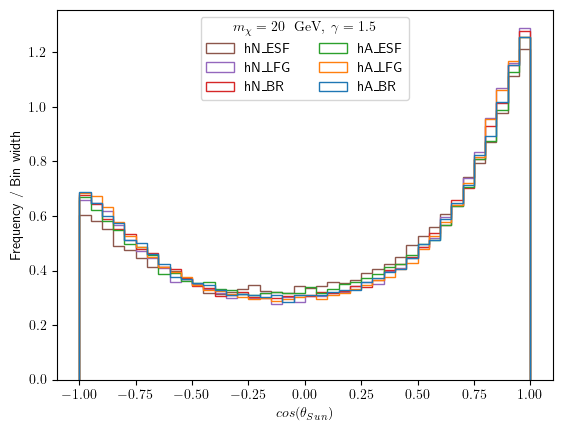

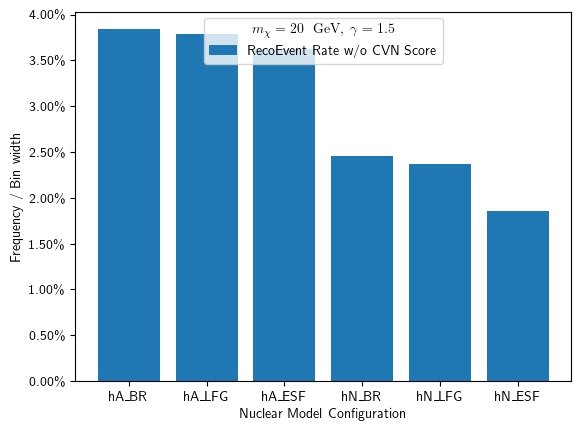

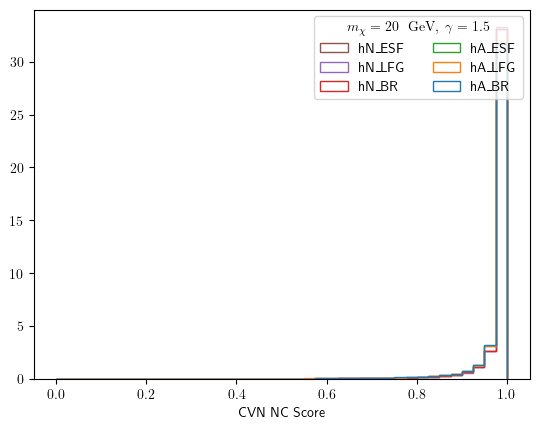

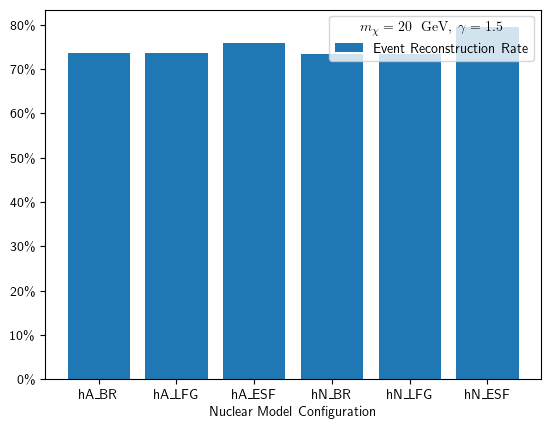

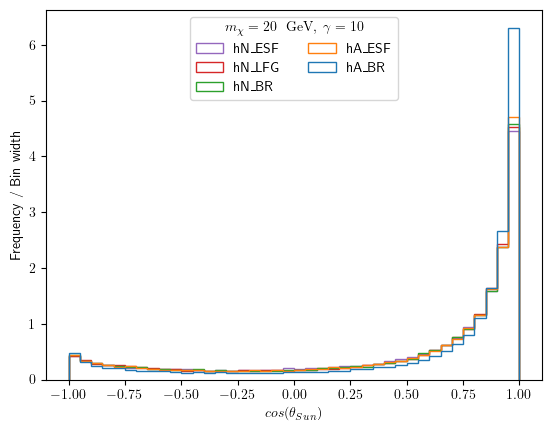

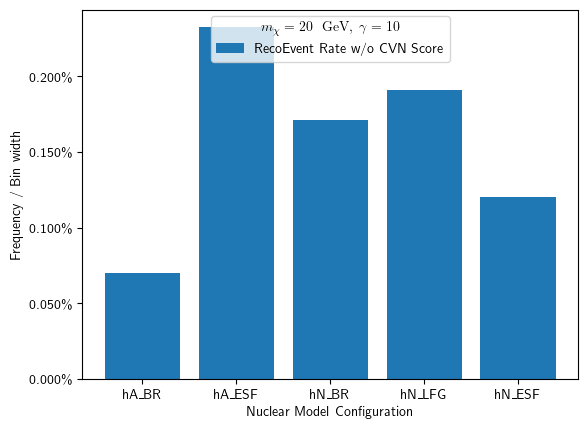

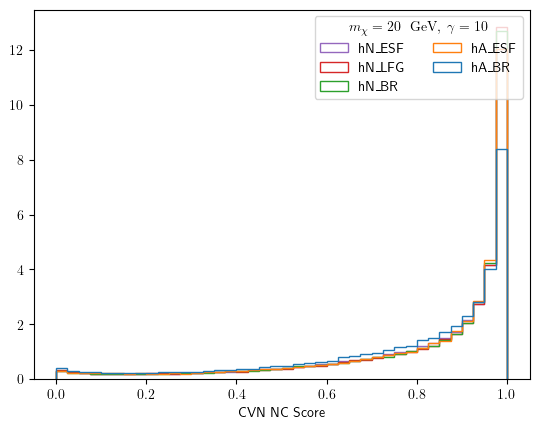

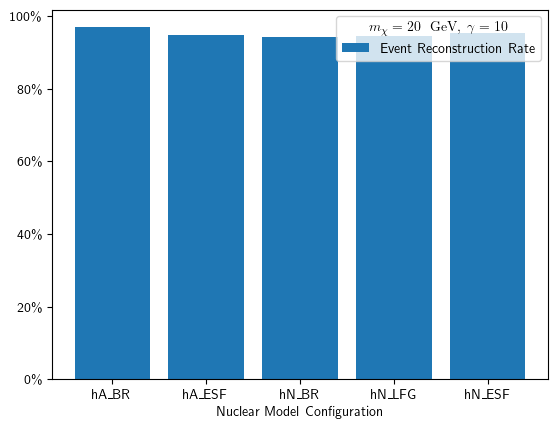

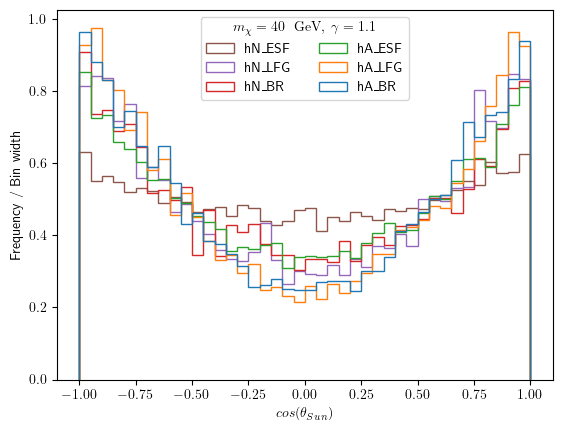

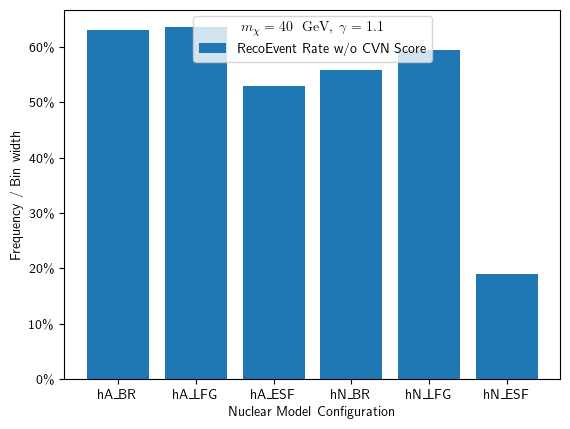

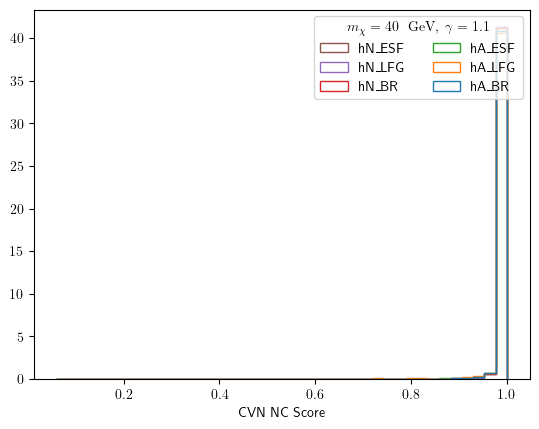

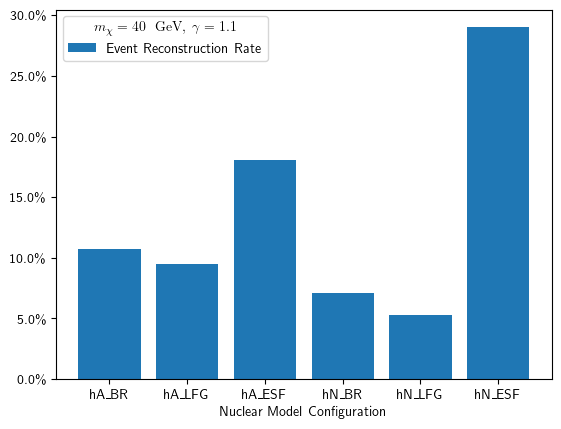

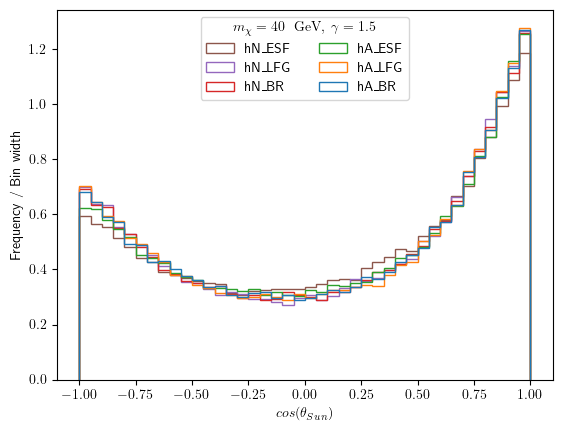

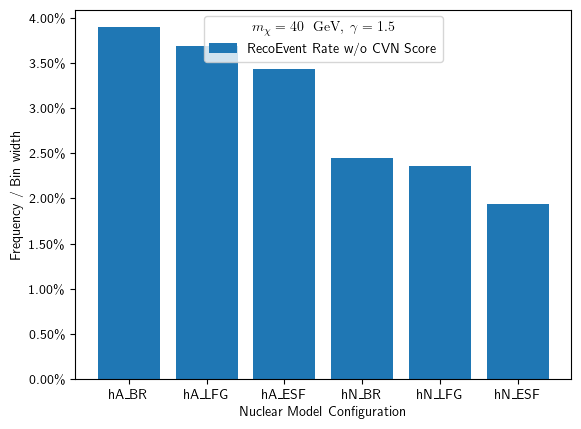

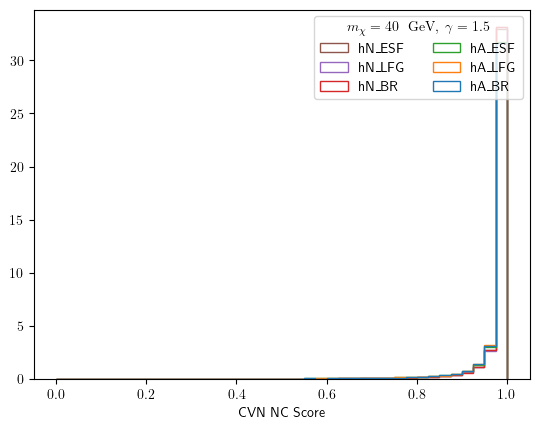

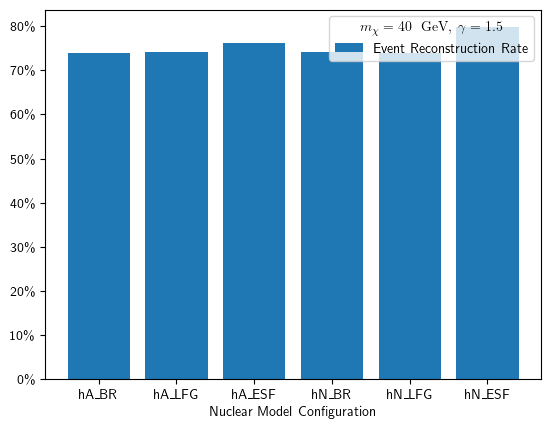

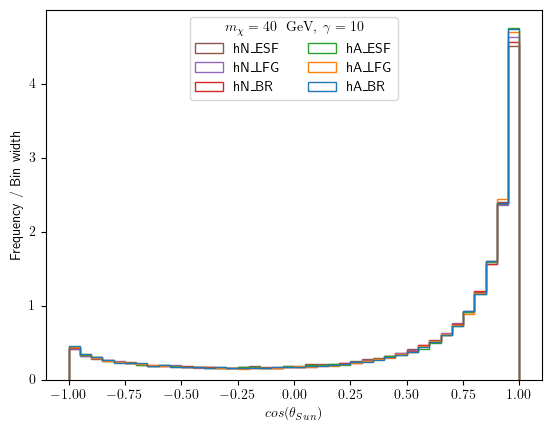

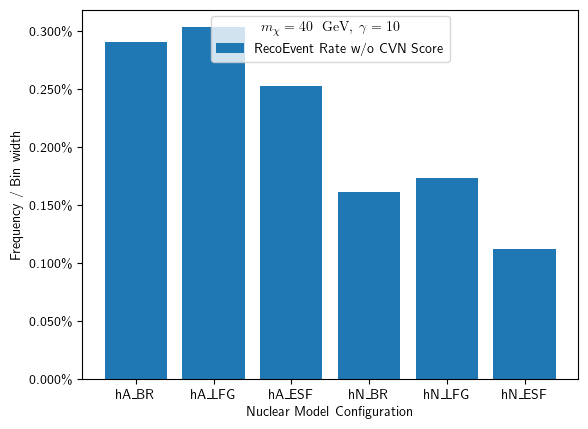

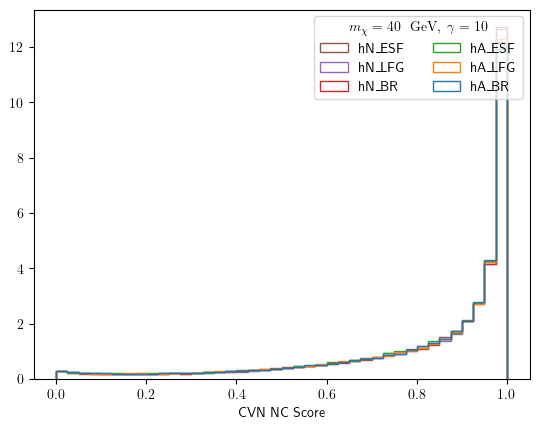

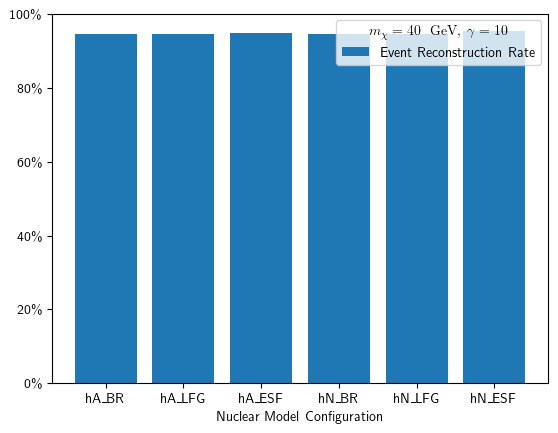

In [6]:

for SAMPLE_INDEX in range(0,12):
    #print(LIST_NUCLEARMODELS)
### Select the sample ####
    infiles_list = ReadNuclearModelSamples(True, list_samples[SAMPLE_INDEX])
    #print(LIST_NUCLEARMODELS)
    intrees_reco = [lambda arg=infile: arg.Get("ana/Atm") for infile in infiles_list]
    intrees_simu = [lambda arg=infile: arg.Get("ana/AllEvents") for infile in infiles_list]
    reco_entries = [lambda arg=intree: arg.Get("ana/Atm").GetEntries() for intree in infiles_list]
    simu_entries = [lambda arg=intree: arg.Get("ana/AllEvents").GetEntries() for intree in infiles_list]
    reco_selection = [lambda arg=index: reco_entries[arg]()/simu_entries[arg]() for index in range(0,len(LIST_NUCLEARMODELS))]

    CosSun_Signal = [lambda arg=intree: GetNpArraysFromTrees2(arg(),"DiffCosAngleTotalMom") for intree in intrees_reco]
    fig, ax = plt.subplots()
    plt.hist([f() for f in CosSun_Signal], bins = 40, histtype = 'step', label= [l for l in LIST_NUCLEARMODELS], density=1)
    plt.xlabel(r'$cos(\theta_{Sun})$')
    plt.ylabel('Frequency / Bin width')
    plt.legend(ncols = 2,  title = list_samples_latex[SAMPLE_INDEX], loc = 'upper center')
    plt.savefig('NuclearModels/CosTheta_wrt_Sun_'+list_samples[SAMPLE_INDEX]+'.png', format='png', dpi=300)
    plt.savefig('NuclearModels/CosTheta_wrt_Sun_'+list_samples[SAMPLE_INDEX]+'.pdf', format='pdf', dpi=300)
    plt.show()

    CVN_NCScore = [lambda arg=intree: GetNpArraysFromTrees(arg(),"CVN_NCScore") for intree in intrees_reco]
    fig, ax = plt.subplots()
    plt.bar(LIST_NUCLEARMODELS,[(f()[f()<0].size/f().size)*100 for f in CVN_NCScore], label="RecoEvent Rate w/o CVN Score")
    plt.legend(ncols = 2, title = list_samples_latex[SAMPLE_INDEX], loc = 'upper center')
    plt.xlabel('Nuclear Model Configuration')
    plt.ylabel('Frequency / Bin width')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.savefig('NuclearModels/Rate_CVN_NoScore_'+list_samples[SAMPLE_INDEX]+'.png', format='png', dpi=300)
    plt.savefig('NuclearModels/Rate_CVN_NoScore_'+list_samples[SAMPLE_INDEX]+'.pdf', format='pdf', dpi=300)
    plt.show()

    fig, ax = plt.subplots()
    plt.hist([f()[f()>0] for f in CVN_NCScore], bins = 40, histtype = 'step', label= [l for l in LIST_NUCLEARMODELS], density=1)
    plt.legend(ncols = 2, title = list_samples_latex[SAMPLE_INDEX], loc = 'upper center')
    plt.xlabel('CVN NC Score')
    plt.savefig('NuclearModels/CVN_NC_Score_'+list_samples[SAMPLE_INDEX]+'.png', format='png', dpi=300)
    plt.savefig('NuclearModels/CVN_NC_Score_'+list_samples[SAMPLE_INDEX]+'.pdf', format='pdf', dpi=300)
    plt.show()

    fig, ax = plt.subplots()
    plt.bar(LIST_NUCLEARMODELS,[f()*100 for f in reco_selection], label="Event Reconstruction Rate")
    plt.legend(ncols = 2, title = list_samples_latex[SAMPLE_INDEX], loc = 'upper center')
    plt.xlabel('Nuclear Model Configuration')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.savefig('NuclearModels/RateReconstruction_CVN_NoScore_'+list_samples[SAMPLE_INDEX]+'.png', format='png', dpi=300)
    plt.savefig('NuclearModels/RateReconstruction_CVN_NoScore_'+list_samples[SAMPLE_INDEX]+'.pdf', format='pdf', dpi=300)
    plt.show()


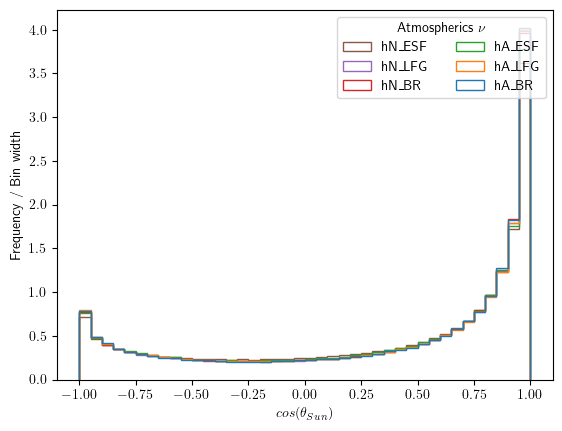

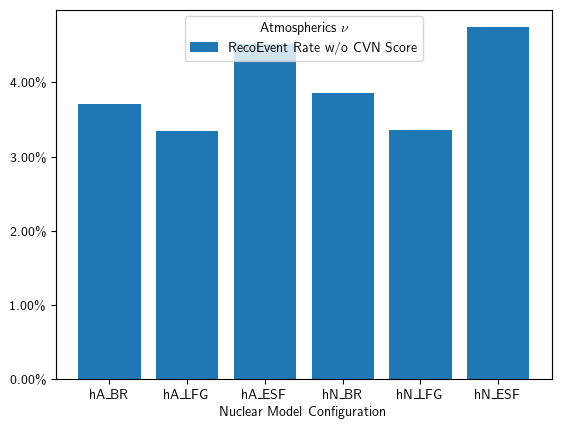

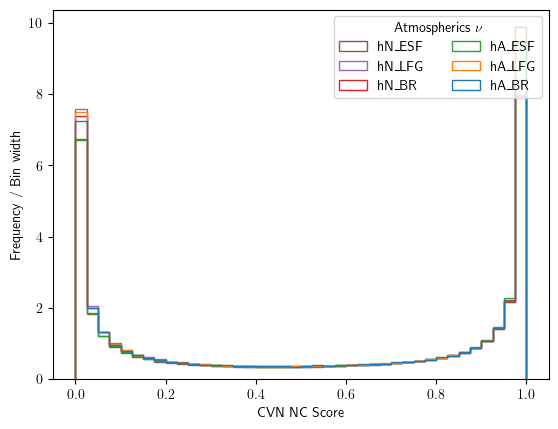

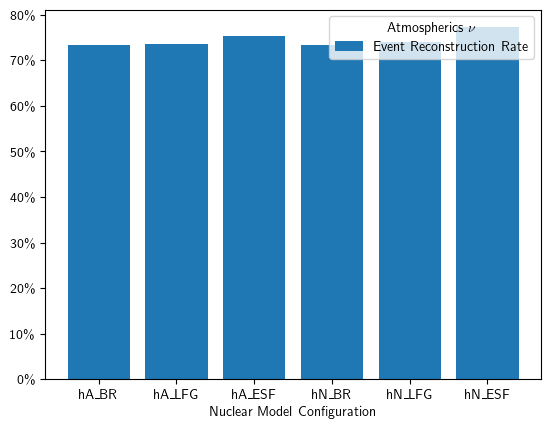

In [7]:
### Select the sample ####
infiles_list = ReadNuclearModelSamples(False)
intrees_reco = [lambda arg=infile: arg.Get("ana/Atm") for infile in infiles_list]
intrees_simu = [lambda arg=infile: arg.Get("ana/AllEvents") for infile in infiles_list]
reco_entries = [lambda arg=intree: arg.Get("ana/Atm").GetEntries() for intree in infiles_list]
simu_entries = [lambda arg=intree: arg.Get("ana/AllEvents").GetEntries() for intree in infiles_list]
reco_selection = [lambda arg=index: reco_entries[arg]()/simu_entries[arg]() for index in range(0,6)]

CosSun_Signal = [lambda arg=intree: GetNpArraysFromTrees(arg(),"DiffCosAngleTotalMom") for intree in intrees_reco]
fig, ax = plt.subplots()
plt.hist([f() for f in CosSun_Signal], bins = 40, histtype = 'step', label= [l for l in LIST_NUCLEARMODELS],density=1)
plt.xlabel(r'$cos(\theta_{Sun})$')
plt.ylabel('Frequency / Bin width')
plt.legend(ncols = 2,  title = r'Atmospherics $\nu$')
plt.savefig('NuclearModels/CosTheta_wrt_Sun_AtmosphericsNu.png', format='png', dpi=300)
plt.savefig('NuclearModels/CosTheta_wrt_Sun_AtmosphericsNu.pdf', format='pdf', dpi=300)
plt.show()

CVN_NCScore = [lambda arg=intree: GetNpArraysFromTrees(arg(),"CVN_NCScore") for intree in intrees_reco]
fig, ax = plt.subplots()
plt.bar(LIST_NUCLEARMODELS,[(f()[f()<0].size/f().size)*100 for f in CVN_NCScore], label="RecoEvent Rate w/o CVN Score")
plt.legend(ncols = 2, title = r'Atmospherics $\nu$', loc='upper center')
plt.xlabel('Nuclear Model Configuration')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig('NuclearModels/Rate_CVN_NoScore_AtmosphericsNu.png', format='png', dpi=300)
plt.savefig('NuclearModels/Rate_CVN_NoScore_AtmosphericsNu.pdf', format='pdf', dpi=300)
plt.show()

fig, ax = plt.subplots()
plt.hist([f()[f()>0] for f in CVN_NCScore], bins = 40, histtype = 'step', label= [l for l in LIST_NUCLEARMODELS],density=1)
plt.legend(ncols = 2, title = r'Atmospherics $\nu$', loc = 'upper center')
plt.ylabel('Frequency / Bin width')
plt.xlabel('CVN NC Score')
plt.savefig('NuclearModels/CVN_NC_Score_AtmosphericsNu.png', format='png', dpi=300)
plt.savefig('NuclearModels/CVN_NC_Score_AtmosphericsNu.pdf', format='pdf', dpi=300)
plt.show()

fig, ax = plt.subplots()
plt.bar(LIST_NUCLEARMODELS,[f()*100 for f in reco_selection], label="Event Reconstruction Rate")
plt.legend(ncols = 2, title =r'Atmospherics $\nu$', loc = 'upper center')
plt.xlabel('Nuclear Model Configuration')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig('NuclearModels/RateReconstruction_CVN_NoScore_AtmosphericsNu.png', format='png', dpi=300)
plt.savefig('NuclearModels/RateReconstruction_CVN_NoScore_AtmosphericsNu.pdf', format='pdf', dpi=300)
plt.show()
